### File Distribution System

In [2]:
import os
import matplotlib.pyplot as plt

In [15]:
def analyze_file_types(directory):
    file_types = {}

    for root, _, files in os.walk(directory):
        for file in files:
            ext = os.path.splitext(file)[1].lower()
            if ext:
                file_types[ext] = file_types.get(ext, 0) + 1

    if not file_types:
        print("No files found in the directory.")
        return

    plt.figure(figsize=(7, 7))
    plt.pie(file_types.values(), labels=file_types.keys(), autopct='%1.1f%%', startangle=140)
    plt.title("File Type Distribution")
    plt.show()

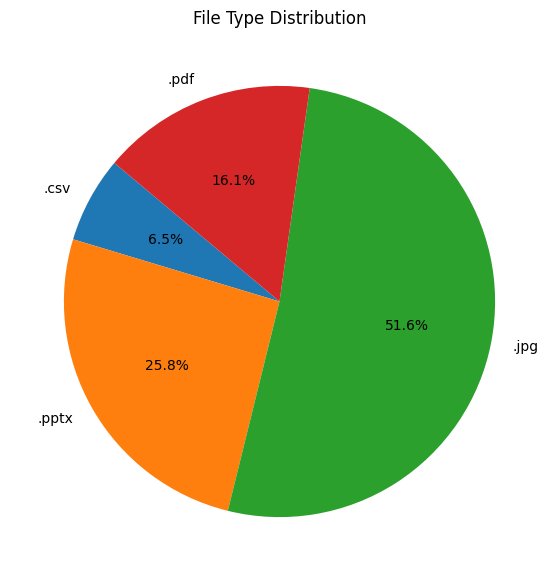

In [21]:
directory_path = "/Users/nyasavishwas/Documents/Doc"
analyze_file_types(directory_path)

### Find Largest Files

In [23]:
def find_largest_files(directory, num_files=10):
    file_sizes = []

    for root, _, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(root, file)
            try:
                size = os.path.getsize(filepath)
                file_sizes.append((filepath, size))
            except OSError:
                continue

    file_sizes.sort(key=lambda x: x[1], reverse=True)

    print("\nTop", num_files, "largest files:")
    for file, size in file_sizes[:num_files]:
        print(f"{file} - {size / (1024 * 1024):.2f} MB")

In [25]:
find_largest_files(directory_path)


Top 10 largest files:
/Users/nyasavishwas/Documents/Doc/lecture6-unit2(Exhaustive).pptx - 3.35 MB
/Users/nyasavishwas/Documents/Doc/Lecture2-Fundamentals.pptx - 1.03 MB
/Users/nyasavishwas/Documents/Doc/UNIT 2.pptx - 0.86 MB
/Users/nyasavishwas/Documents/Doc/23_09_2024_page-0001.jpg - 0.84 MB
/Users/nyasavishwas/Documents/Doc/New/23_09_2024_page-0001.jpg - 0.84 MB
/Users/nyasavishwas/Documents/Doc/11_12_2024_page-0001.jpg - 0.79 MB
/Users/nyasavishwas/Documents/Doc/New/11_12_2024_page-0001.jpg - 0.79 MB
/Users/nyasavishwas/Documents/Doc/11_11_2024_page-0001.jpg - 0.79 MB
/Users/nyasavishwas/Documents/Doc/New/11_11_2024_page-0001.jpg - 0.79 MB
/Users/nyasavishwas/Documents/Doc/22_09_2024_page-0001.jpg - 0.79 MB


### Duplicate File Finder

In [26]:
import hashlib

In [27]:
def hash_file(filepath):
    hasher = hashlib.md5()
    try:
        with open(filepath, "rb") as f:
            hasher.update(f.read())
    except OSError:
        return None
    return hasher.hexdigest()

In [28]:
def find_duplicate_files(directory):
    file_hashes = {}
    duplicates = []

    for root, _, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(root, file)
            file_hash = hash_file(filepath)
            if file_hash:
                if file_hash in file_hashes:
                    duplicates.append((file_hashes[file_hash], filepath))
                else:
                    file_hashes[file_hash] = filepath

    if duplicates:
        print("\nDuplicate Files Found:")
        for original, duplicate in duplicates:
            print(f"Original: {original}  ->  Duplicate: {duplicate}")
    else:
        print("\nNo duplicate files found.")

In [29]:
find_duplicate_files(directory_path)


Duplicate Files Found:
Original: /Users/nyasavishwas/Documents/Doc/distribution_of_raw_materials_by_direct_sale_and_agency_sales_by_sidco_2013.csv  ->  Duplicate: /Users/nyasavishwas/Documents/Doc/New/distribution_of_raw_materials_by_direct_sale_and_agency_sales_by_sidco_2013.csv
Original: /Users/nyasavishwas/Documents/Doc/14_11_2024_page-0001.jpg  ->  Duplicate: /Users/nyasavishwas/Documents/Doc/New/14_11_2024_page-0001.jpg
Original: /Users/nyasavishwas/Documents/Doc/22_09_2024_page-0001.jpg  ->  Duplicate: /Users/nyasavishwas/Documents/Doc/New/22_09_2024_page-0001.jpg
Original: /Users/nyasavishwas/Documents/Doc/A434234317_20_2025_CA KM006 Odd.pdf  ->  Duplicate: /Users/nyasavishwas/Documents/Doc/New/A434234317_20_2025_CA KM006 Odd.pdf
Original: /Users/nyasavishwas/Documents/Doc/06_12_2024_page-0001.jpg  ->  Duplicate: /Users/nyasavishwas/Documents/Doc/New/06_12_2024_page-0001.jpg
Original: /Users/nyasavishwas/Documents/Doc/23_09_2024_page-0001.jpg  ->  Duplicate: /Users/nyasavishwas